# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [120]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

display(data)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

Для начала определим список категориальных признаков, которые у нас имеются:


* artists
* album_name
* track_name
* explicit
* key
* mode
* time_signature
* track_genre

Строковые признаки artists, album_name, track_name предположительно не являются значимыми для целевой переменной, значит от них мы можем избавиться.

Признаки key, mode, time_signature уже закодированы.

А признаки explicit и track_genre необходимо закодировать. Для track_genre предлагается использование OneHot Encoding, поскольку для этого признака нету внутреннего порядка, следовательно порядок чисел не имеет значение, а мы не хотим создавать ложные зависимости. Для explicit достаточно заменить булевые значения на численные.

В конце проверим сколько у нас есть отсутствующих значений. Убедимся, что у нас все значение присутствуют, а если нет, удалим записи с отсутствующими значениями.

In [121]:
data = data.drop(['artists', 'album_name', 'track_name'], axis=1)

data = pd.get_dummies(data, columns=['track_genre'])
data['explicit'] = data['explicit'].apply(lambda x: 1 if x == True else 0)

y = data['energy']
X = data.drop(['energy'], axis=1)
display(X)

missing_values = data.isna().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,0,0.676,1,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,55,149610,0,0.420,1,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,0
2,57,210826,0,0.438,0,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,71,201933,0,0.266,0,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,0
4,82,198853,0,0.618,2,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,5,-16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,22,385000,0,0.174,0,-18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,0,1
113997,22,271466,0,0.629,0,-10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,0,1
113998,41,283893,0,0.587,7,-10.889,1,0.0297,0.3810,0.000000,...,0,0,0,0,0,0,0,0,0,1


Columns with missing values:
Series([], dtype: int64)


#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей!

In [123]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: RMSE = {rmse}, R^2 = {r2}\n")
    return (rmse, r2)

data_dropped = pd.read_csv('dataset.csv')

columns_to_drop = [
    'artists',
    'album_name',
    'track_name',
    'explicit',
    'key',
    'mode',
    'time_signature',
    'track_genre'
]

X_dropped = data_dropped.drop(['energy'] + columns_to_drop, axis=1)

display(X_dropped)

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, test_size=0.25, random_state=7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dropped)
X_test_scaled = scaler.transform(X_test_dropped)

X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

models_dropped = {}

# Statsmodels
# LR
models_dropped["SM-LR"] = sm.OLS(y_train_dropped, X_train_sm).fit()
models_dropped["SM-LR"].params
# Ridge
models_dropped["SM-Ridge"] = sm.OLS(y_train_dropped, X_train_sm).fit_regularized(alpha=0.03, L1_wt=0)
models_dropped["SM-Ridge"].params
# Lasso
models_dropped["SM-Lasso"] = sm.OLS(y_train_dropped, X_train_sm).fit_regularized(alpha=0.05, L1_wt=1)
models_dropped["SM-Lasso"].params
# ElasticNet
models_dropped["SM-ElasticNet"] = sm.OLS(y_train_dropped, X_train_sm).fit_regularized(alpha=0.01, L1_wt=0.4)
models_dropped["SM-ElasticNet"].params
# Sklearn
# LR
models_dropped["SKL-LR"] = LinearRegression().fit(X_train_scaled, y_train_dropped)

# Ridge
models_dropped["SKL-Ridge"] = Ridge(alpha=0.03).fit(X_train_scaled, y_train_dropped)

# Lasso
models_dropped["SKL-Lasso"] = Lasso(alpha=0.05).fit(X_train_scaled, y_train_dropped)

# ElasticNet
models_dropped["SKL-ElasticNet"] = ElasticNet(alpha=0.01, l1_ratio=0.4).fit(X_train_scaled, y_train_dropped)

result_dropped = {}

for [name, model] in models_dropped.items():
  prediction = None
  if name.startswith("SKL"):
    prediction = model.predict(X_test_scaled)
  else:
    prediction = model.predict(X_test_sm)
  result_dropped[name] = evaluate_model(y_test_dropped, prediction, name)

,popularity,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,149610,0.420,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,210826,0.438,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,201933,0.266,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,198853,0.618,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113996,22,385000,0.174,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113997,22,271466,0.629,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113998,41,283893,0.587,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


SM-LR: RMSE = 0.12187052768508619, R^2 = 0.7636016854471843

SM-Ridge: RMSE = 0.12329725300411724, R^2 = 0.7580343068334253

SM-Lasso: RMSE = 0.154930535710214, R^2 = 0.6179492665266193

SM-ElasticNet: RMSE = 0.12280468241939398, R^2 = 0.7599637433553765

SKL-LR: RMSE = 0.12187052768508617, R^2 = 0.7636016854471843

SKL-Ridge: RMSE = 0.12187052713188165, R^2 = 0.7636016875933409

SKL-Lasso: RMSE = 0.1471071204791906, R^2 = 0.6555593645544675

SKL-ElasticNet: RMSE = 0.12259881682500326, R^2 = 0.7607678460441432



### Анализ полученных результатов:
Можно сказать, что согласно все модели имеют неплохую точность согласно метрике RMSE, то есть среднеквадратичная ошибка для всех моделей в пределах 0.15. Также модели неплохо справляются с описанием вариативных данных согласно метрике R^2.
Также стоит отметить, что хуже всех с задачей справилась модель Lasso. Разница между результатами моделей sklearn и statsmodels практически незаметна, видно лишь, что для модели Lasso вариант из sklearn справляется немного лучше

#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [124]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

models = {}

# Statsmodels
# LR
models["SM-LR"] = sm.OLS(y_train, X_train_sm).fit()

# Ridge
models["SM-Ridge"] = sm.OLS(y_train, X_train_sm).fit_regularized(alpha=0.03, L1_wt=0)

# Lasso
models["SM-Lasso"] = sm.OLS(y_train, X_train_sm).fit_regularized(alpha=0.05, L1_wt=1)

# ElasticNet
models["SM-ElasticNet"] = sm.OLS(y_train, X_train_sm).fit_regularized(alpha=0.01, L1_wt=0.4)

# Sklearn
# LR
models["SKL-LR"] = LinearRegression().fit(X_train_scaled, y_train)

# Ridge
models["SKL-Ridge"] = Ridge(alpha=0.03).fit(X_train_scaled, y_train)

# Lasso
models["SKL-Lasso"] = Lasso(alpha=0.05).fit(X_train_scaled, y_train)

# ElasticNet
models["SKL-ElasticNet"] = ElasticNet(alpha=0.01, l1_ratio=0.4).fit(X_train_scaled, y_train)

result = {}
for [name, model] in models.items():
  prediction = None
  if name.startswith("SKL"):
    prediction = model.predict(X_test_scaled)
  else:
    prediction = model.predict(X_test_sm)
  result[name] = evaluate_model(y_test, prediction, name)
  print(f"Result without categorical features: RMSE: {result_dropped[name][0]}, R^2: {result_dropped[name][1]}\n")
  print(f"Imporvements: RMSE: {result[name][0] - result_dropped[name][0]}, R^2: {result[name][1] - result_dropped[name][1]}\n\n")

SM-LR: RMSE = 0.11242719795086323, R^2 = 0.7988177012267911

Result without categorical features: RMSE: 0.12187052768508619, R^2: 0.7636016854471843

Imporvements: RMSE: -0.00944332973422296, R^2: 0.03521601577960676


SM-Ridge: RMSE = 0.11406182863702569, R^2 = 0.7929250083656005

Result without categorical features: RMSE: 0.12329725300411724, R^2: 0.7580343068334253

Imporvements: RMSE: -0.009235424367091558, R^2: 0.03489070153217522


SM-Lasso: RMSE = 0.154930535710214, R^2 = 0.6179492665266193

Result without categorical features: RMSE: 0.154930535710214, R^2: 0.6179492665266193

Imporvements: RMSE: 0.0, R^2: 0.0


SM-ElasticNet: RMSE = 0.11856882421823443, R^2 = 0.7762371323504723

Result without categorical features: RMSE: 0.12280468241939398, R^2: 0.7599637433553765

Imporvements: RMSE: -0.0042358582011595425, R^2: 0.016273388995095783


SKL-LR: RMSE = 0.11342015966895426, R^2 = 0.7952483070419161

Result without categorical features: RMSE: 0.12187052768508617, R^2: 0.7636016854

### Анализ полученных результатов:
Смотря на результаты можно видеть, что категориальные признаки улучшили метрики всех моделей кроме Lasso - для нее изменений не обнаружено. При этом большее влияние они оказали на R^2, то есть умение модели описывать различные данные. Однако в целом изменения незначительные, то есть категориальные признаки несут слабую значимость для нашей целевой переменной energy, а например для Lasso и вовсе не имеют значимости.

#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы

Coefficients for SM-LR:
popularity(Near to zero!): -0.003155260403357675
duration_ms(Near to zero!): 0.001450560740070154
explicit(Near to zero!): -0.002653050550176943
danceability: -0.019828063952039895
key(Near to zero!): 0.0011567942276085451
loudness: 0.1356178053948761
mode(Near to zero!): -0.002824351846917859
speechiness: 0.022244670370841588
acousticness: -0.08278828849823769
instrumentalness: 0.024295619792407946
liveness: 0.02021134830828039
valence: 0.040952753787322965
tempo(Near to zero!): 0.0070399006138753125
time_signature(Near to zero!): 0.008037076357813594
track_genre_acoustic(Near to zero!): -0.007366437585791365
track_genre_afrobeat(Near to zero!): 0.0006208346161830104
track_genre_alt-rock(Near to zero!): 0.0013355449220396802
track_genre_alternative(Near to zero!): -0.0015039586857211193
track_genre_ambient(Near to zero!): -0.00016218898684023102
track_genre_anime(Near to zero!): 0.0005192338740461594
track_genre_black-metal(Near to zero!): 0.009687067186146802


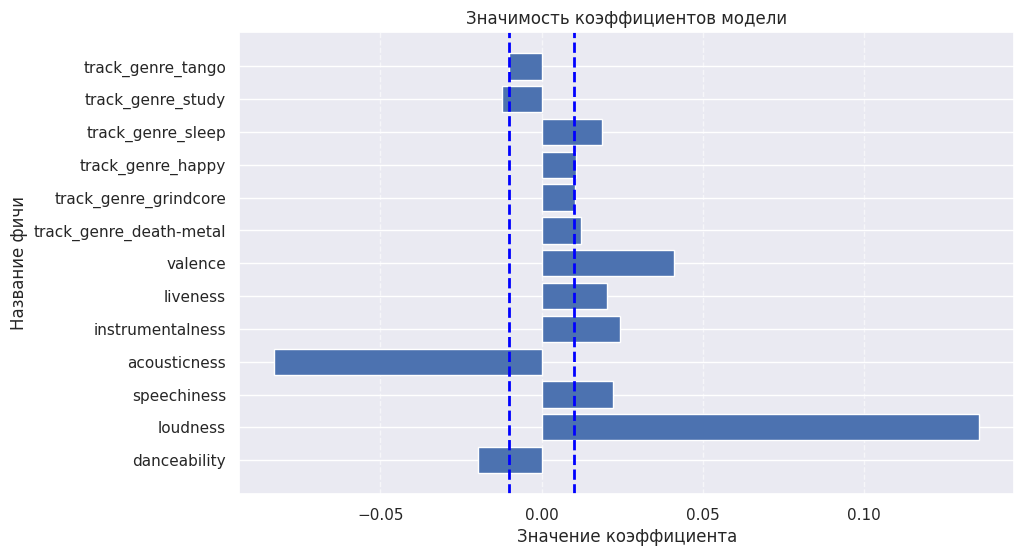

Coefficients for SM-Ridge:
popularity(Near to zero!): -0.003172920335099993
duration_ms(Near to zero!): 0.001660904080650251
explicit(Near to zero!): -0.0023426577068281947
danceability: -0.017862840085920137
key(Near to zero!): 0.0012658726238240338
loudness: 0.12839795448479036
mode(Near to zero!): -0.0028990940465821818
speechiness: 0.021138372678989673
acousticness: -0.08202456972369901
instrumentalness: 0.021153766161609258
liveness: 0.020426960569254617
valence: 0.03919462914415647
tempo(Near to zero!): 0.0079367957598532
time_signature(Near to zero!): 0.008035809814686738
track_genre_acoustic(Near to zero!): -0.007496787216428423
track_genre_afrobeat(Near to zero!): 0.0008050163786205609
track_genre_alt-rock(Near to zero!): 0.0015475670092218962
track_genre_alternative(Near to zero!): -0.0012539642356960586
track_genre_ambient(Near to zero!): -0.0010963441998777185
track_genre_anime(Near to zero!): 0.0006657792348141827
track_genre_black-metal: 0.010031492918320917
track_genre_b

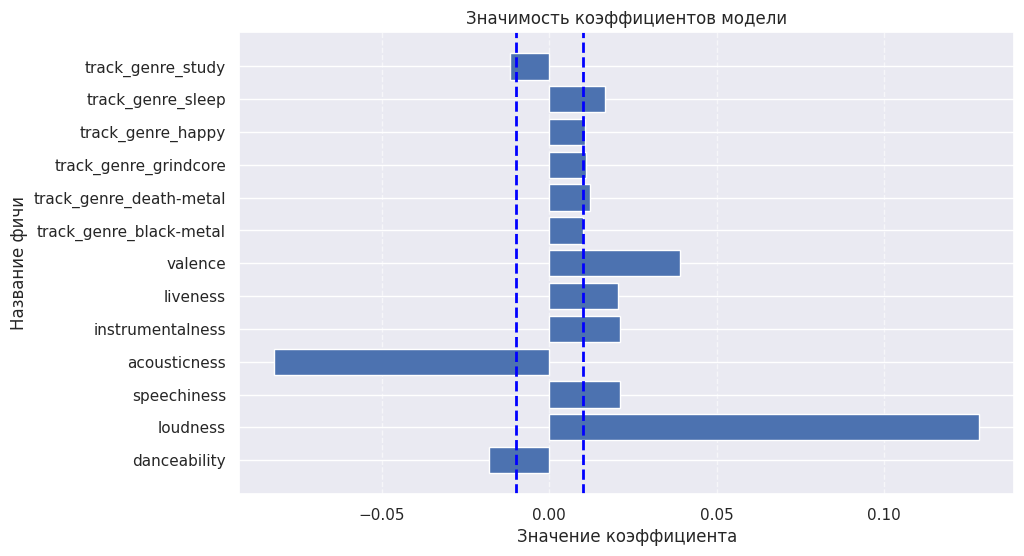

Coefficients for SM-Lasso:
popularity(Zero value!): 0.0
duration_ms(Zero value!): 0.0
explicit(Zero value!): 0.0
danceability(Zero value!): 0.0
key(Zero value!): 0.0
loudness: 0.09552659329080179
mode(Zero value!): 0.0
speechiness(Zero value!): 0.0
acousticness: -0.07856456151889678
instrumentalness(Zero value!): 0.0
liveness(Zero value!): 0.0
valence(Zero value!): 0.0
tempo(Zero value!): 0.0
time_signature(Zero value!): 0.0
track_genre_acoustic(Zero value!): 0.0
track_genre_afrobeat(Zero value!): 0.0
track_genre_alt-rock(Zero value!): 0.0
track_genre_alternative(Zero value!): 0.0
track_genre_ambient(Zero value!): 0.0
track_genre_anime(Zero value!): 0.0
track_genre_black-metal(Zero value!): 0.0
track_genre_bluegrass(Zero value!): 0.0
track_genre_blues(Zero value!): 0.0
track_genre_brazil(Zero value!): 0.0
track_genre_breakbeat(Zero value!): 0.0
track_genre_british(Zero value!): 0.0
track_genre_cantopop(Zero value!): 0.0
track_genre_chicago-house(Zero value!): 0.0
track_genre_children(Z

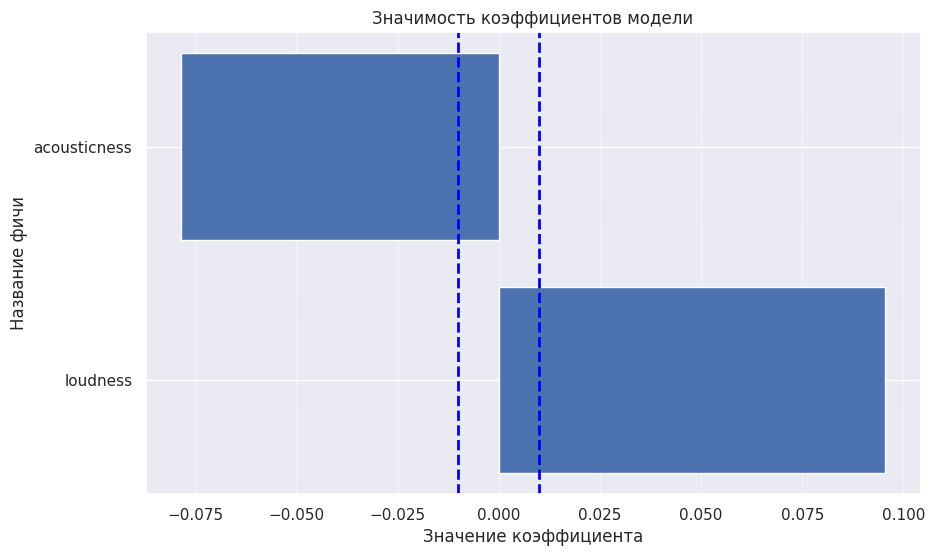

Coefficients for SM-ElasticNet:
popularity(Zero value!): 0.0
duration_ms(Near to zero!): 0.0010601029880763914
explicit(Zero value!): 0.0
danceability(Zero value!): 0.0
key(Zero value!): 0.0
loudness: 0.1292798614192802
mode(Zero value!): 0.0
speechiness: 0.016588839356596576
acousticness: -0.09645865002711711
instrumentalness: 0.02477038367945213
liveness: 0.0236736073257148
valence: 0.025807099205487113
tempo(Near to zero!): 0.009333848273768715
time_signature(Near to zero!): 0.0020123765753620815
track_genre_acoustic(Near to zero!): -0.002548467424243449
track_genre_afrobeat(Zero value!): 0.0
track_genre_alt-rock(Zero value!): 0.0
track_genre_alternative(Zero value!): 0.0
track_genre_ambient(Zero value!): 0.0
track_genre_anime(Zero value!): 0.0
track_genre_black-metal(Near to zero!): 0.00649521776639093
track_genre_bluegrass(Zero value!): 0.0
track_genre_blues(Zero value!): 0.0
track_genre_brazil(Zero value!): 0.0
track_genre_breakbeat(Near to zero!): 0.001215251779788988
track_genr

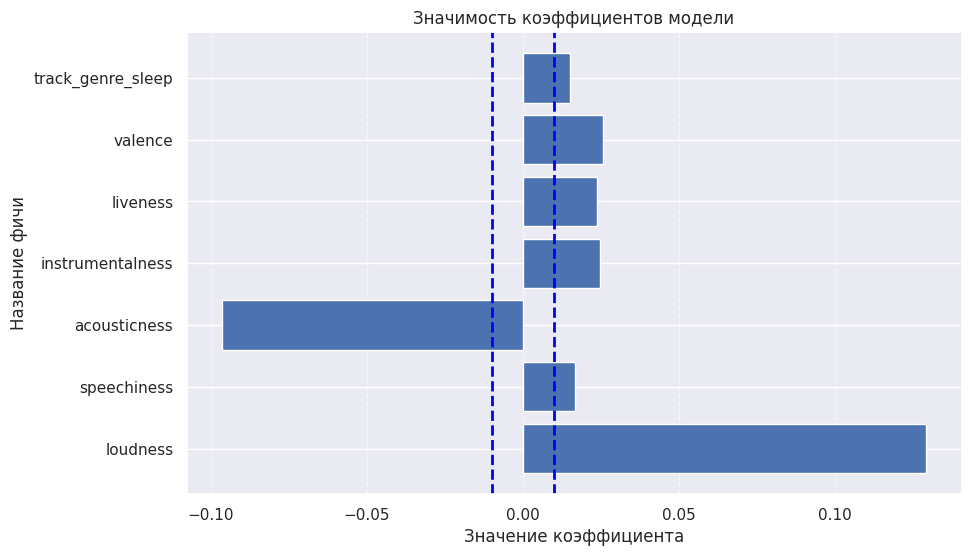

Coefficients for SKL-LR:
popularity(Near to zero!): -0.003148961594598003
duration_ms(Near to zero!): 0.0015428835202181837
explicit(Near to zero!): -0.002698941861462467
danceability: -0.019749729680913687
key(Near to zero!): 0.0011572758948846865
loudness: 0.13560860065511407
mode(Near to zero!): -0.002917748509359731
speechiness: 0.022223605200129455
acousticness: -0.0827883567349283
instrumentalness: 0.024209138716951926
liveness: 0.02015604924410093
valence: 0.04101354134576812
tempo(Near to zero!): 0.0069926180404665805
time_signature(Near to zero!): 0.007997051874697014
track_genre_acoustic: -78953765310.42094
track_genre_afrobeat: -79729222757.89131
track_genre_alt-rock: -79780642131.71198
track_genre_alternative: -78849773714.08278
track_genre_ambient: -78484678847.9936
track_genre_anime: -78693519343.06065
track_genre_black-metal: -80088439492.95972
track_genre_bluegrass: -78589170952.3275
track_genre_blues: -78589170952.32756
track_genre_brazil: -78641363076.1221
track_genre

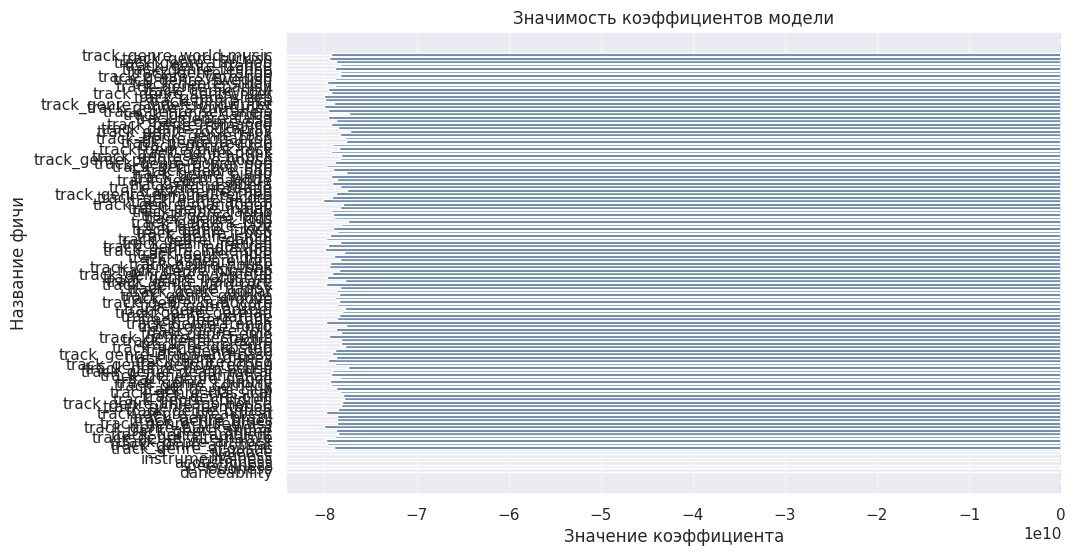

Coefficients for SKL-Ridge:
popularity(Near to zero!): -0.0031552607184577265
duration_ms(Near to zero!): 0.0014505632796008843
explicit(Near to zero!): -0.0026530468574766887
danceability: -0.019828039102805357
key(Near to zero!): 0.0011567956093938153
loudness: 0.13561771313109477
mode(Near to zero!): -0.0028243526873125142
speechiness: 0.022244656216990788
acousticness: -0.08278828069575618
instrumentalness: 0.024295579232700606
liveness: 0.02021135149685861
valence: 0.04095273202468259
tempo(Near to zero!): 0.007039912008934159
time_signature(Near to zero!): 0.008037076221812926
track_genre_acoustic(Near to zero!): -0.007366439399183466
track_genre_afrobeat(Near to zero!): 0.0006208370149463612
track_genre_alt-rock(Near to zero!): 0.0013355476212732705
track_genre_alternative(Near to zero!): -0.0015039555483578552
track_genre_ambient(Near to zero!): -0.00016220091166202605
track_genre_anime(Near to zero!): 0.0005192358253480718
track_genre_black-metal(Near to zero!): 0.009687071945

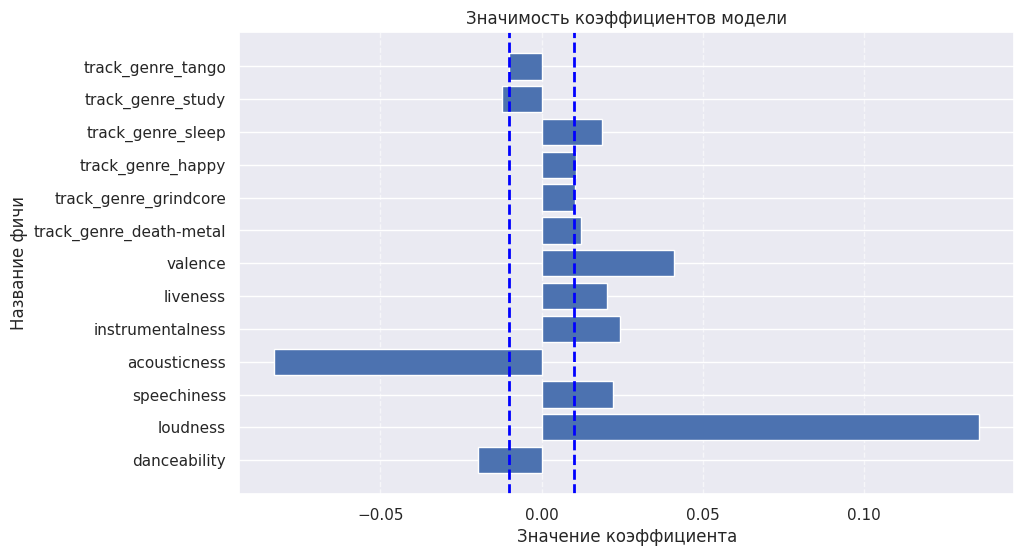

Coefficients for SKL-Lasso:
popularity(Zero value!): -0.0
duration_ms(Zero value!): 0.0
explicit(Zero value!): 0.0
danceability(Zero value!): -0.0
key(Zero value!): 0.0
loudness: 0.09552991782797354
mode(Zero value!): -0.0
speechiness(Zero value!): 0.0
acousticness: -0.07856260471449401
instrumentalness(Zero value!): 0.0
liveness(Zero value!): 0.0
valence(Zero value!): 0.0
tempo(Zero value!): 0.0
time_signature(Zero value!): 0.0
track_genre_acoustic(Zero value!): -0.0
track_genre_afrobeat(Zero value!): 0.0
track_genre_alt-rock(Zero value!): 0.0
track_genre_alternative(Zero value!): -0.0
track_genre_ambient(Zero value!): -0.0
track_genre_anime(Zero value!): 0.0
track_genre_black-metal(Zero value!): 0.0
track_genre_bluegrass(Zero value!): -0.0
track_genre_blues(Zero value!): -0.0
track_genre_brazil(Zero value!): -0.0
track_genre_breakbeat(Zero value!): 0.0
track_genre_british(Zero value!): -0.0
track_genre_cantopop(Zero value!): -0.0
track_genre_chicago-house(Zero value!): 0.0
track_genr

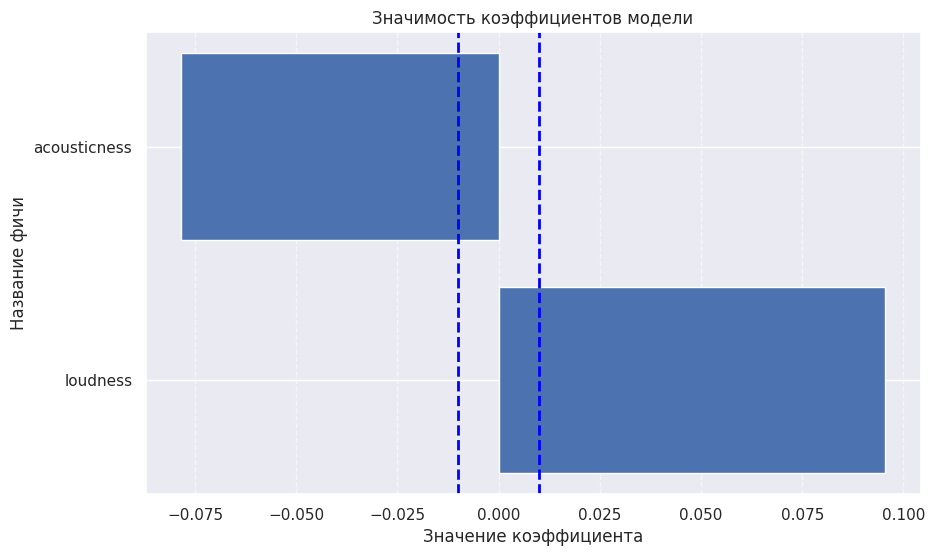

Coefficients for SKL-ElasticNet:
popularity(Zero value!): -0.0
duration_ms(Near to zero!): 0.000996533257181288
explicit(Zero value!): -0.0
danceability: -0.016911304859207055
key(Zero value!): 0.0
loudness: 0.13069039313252814
mode(Near to zero!): -5.9124458699886415e-05
speechiness: 0.018824348449402235
acousticness: -0.09886072789797339
instrumentalness: 0.0252225654475754
liveness: 0.021390855842625643
valence: 0.03177007942958931
tempo(Near to zero!): 0.00689719553732116
time_signature(Near to zero!): 0.003536590767849897
track_genre_acoustic(Near to zero!): -0.002454469911376154
track_genre_afrobeat(Zero value!): 0.0
track_genre_alt-rock(Zero value!): 0.0
track_genre_alternative(Zero value!): -0.0
track_genre_ambient(Zero value!): 0.0
track_genre_anime(Zero value!): 0.0
track_genre_black-metal(Near to zero!): 0.004381332024879483
track_genre_bluegrass(Zero value!): -0.0
track_genre_blues(Zero value!): -0.0
track_genre_brazil(Zero value!): -0.0
track_genre_breakbeat(Near to zero!)

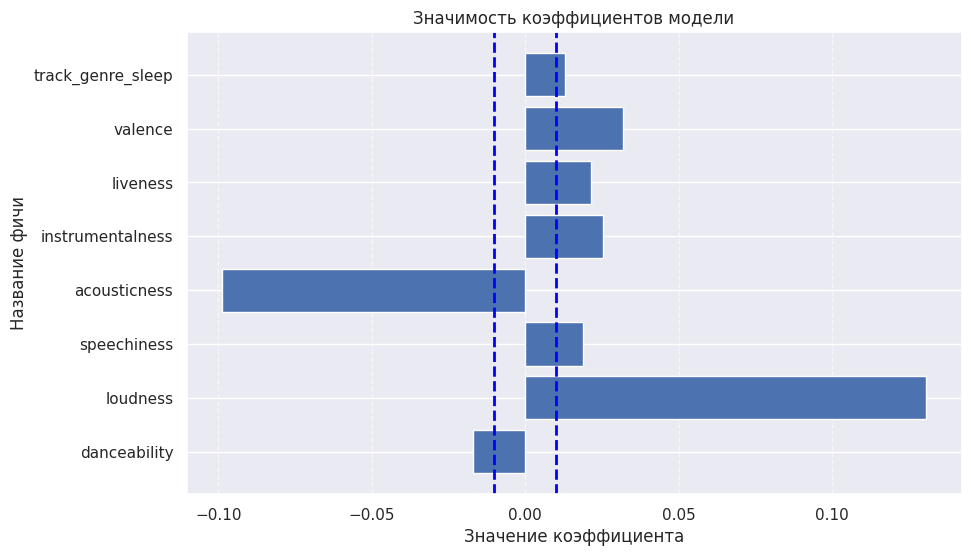

In [83]:
from sklearn.feature_selection import f_regression

def show_coefficients(name, features, coefs):
  print(f"Coefficients for {name}:")
  significant_coefs = {}
  for feature, coef in zip(features, coefs):
      tag = ""
      if abs(coef) < 0.01:
        tag = "(Near to zero!)"
      if coef == 0.0:
        tag = "(Zero value!)"
      print(f"{feature}{tag}: {coef}")
      if (tag == ""):
        significant_coefs[feature] = coef
  print("\n\nSignificant coefficients:\n")
  for [feature, coef] in significant_coefs.items():
    print(f"{feature}: {coef}")

  plt.figure(figsize=(10, 6))
  plt.barh(list(significant_coefs.keys()), list(significant_coefs.values()), color='b')
  plt.xlabel('Значение коэффициента')
  plt.ylabel('Название фичи')
  plt.title('Значимость коэффициентов модели')
  plt.grid(axis='x', linestyle='--', alpha=0.6)
  plt.axvline(-0.01, color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(0.01, color='blue', linestyle='dashed', linewidth=2)

  plt.show()
  print('=' * 100)


for [name, model] in models.items():
  if name.startswith("SM"):
    show_coefficients(name, X_train.columns, model.params[1:])
  else:
    show_coefficients(name, X_train.columns, model.coef_)

### Анализ полученных результатов:
При анализе полученных результатов заметил, что получились не очень хорошие коэффициенты у линейной регрессии sklearn. Такие значения могут свидетельствовать о возникновении мультиколлинеарности, которая с большой вероятностью возникла из-за кодирования жанра с помощью OneHot Encoding. Однак это не является большой проблемой, посколько три прочие модели как раз направлены на то, чтобы этой проблемы избежать. Если говорить про результаты в целом, то ниже приведены признаки и количество моделей, которые посчитали его значимым(в список не включены результаты линейной регрессии sklearn из-за ее нестабильности):
* danceability: 4
* loudness: 7
* speechiness: 5
* acousticness: 7
* instrumentalness: 5
* liveness: 5
* valence: 5
* track_genre_death-metal: 3
* track_genre_grindcore: 3
* track_genre_happy: 3
* track_genre_sleep: 5
* track_genre_study: 3
* track_genre_tango: 2
* track_genre_black-metal: 1

Можно сказать, что большинство категориальных признаков не являются значимыми. Однако некоторые жанры, обладающие особой энергией, вроде sleep, metal, happy, могут оказывать хотя бы небольшое влияние. Основными регрессорами согласно результатам выступают loudness и acousticness, что в действительности в большей степени определяет энергию трека. Остальные коэффициенты были либо равны нулю, либо меньше 0.01 по модулю, то есть не считались значимыми. Модель Lasso и вовсе посчитала значимыми только признаки loudness и acousticness. Различия помимо линейной регресии между моделями разных библиотек незначительны. Однако в целом согласно метрикам и результатам значимости коэффициентов можно сказать, что модели значимы.

#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [40]:
X_train_sm_copy = sm.add_constant(X_train_scaled)
X_test_sm_copy = sm.add_constant(X_test_scaled)
features = X.columns

while True:
    model = sm.OLS(y_train, X_train_sm_copy).fit()
    p_values = model.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.01:
      index = int(p_values.idxmax()[1:])
      X_train_sm_copy = np.delete(X_train_sm_copy, index, axis=1)
      X_test_sm_copy = np.delete(X_test_sm_copy, index, axis=1)
      features = features.delete(index)
    else:
        break

print(model.summary())
prediction = model.predict(X_test_sm_copy)
evaluate_model(y_test, prediction, "Linear Regression(SM)")
coefs = model.params[1:]
for i in range(len(features)):
  print(f'{features[i]}: {coefs[i]}')

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     3048.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:07:44   Log-Likelihood:                 65686.
No. Observations:               85500   AIC:                        -1.311e+05
Df Residuals:                   85386   BIC:                        -1.301e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.000   1671.539      0.0

### Анализ полученных результатов:
После обучения с backward elimination, в модели сохранилось больше значимых признаков, преимущественно жанры. Однако метрики модели не изменились, это лишь говорит о том, что эти категориальные признаки не сильно помогают описывать тестовую выборку.

#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha_values = np.logspace(-4, 3, 100)
grid_search = GridSearchCV(Lasso(), {'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

Best Alpha: 0.0001


## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [146]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=250.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_cf = 0.0):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.reg_cf = reg_cf

    def update_weights_and_loss(self, adjustment, X, y):
        self.w += adjustment
        self.loss_history.append(self.calc_loss(X, y))

    def gradient_descent(self, X, y):
        for iteration in range(self.max_iter):
          gradient = self.calc_gradient(X, y)
          adjustment = -self.eta * gradient
          if np.all(np.abs(adjustment) < self.tolerance):
            break
          self.update_weights_and_loss(adjustment, X, y)

    def stochastic_descent(self, X, y):
        delta = int(self.delta)
        for iteration in range(self.max_iter):
            random_sample = np.random.randint(0, X.shape[0])
            x_i = X[random_sample:random_sample + delta]
            y_i = y[random_sample:random_sample + delta]
            gradient = self.calc_gradient(x_i, y_i)
            adjustment = -self.eta * gradient
            if np.all(np.abs(adjustment) < self.tolerance):
                break
            self.update_weights_and_loss(adjustment, X, y)

    def momentum(self, X, y):
        momentum = np.zeros(X.shape[1])
        for iteration in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            momentum = self.alpha * momentum + self.eta * gradient
            adjustment = -momentum
            if np.all(np.abs(adjustment) < self.tolerance):
                break
            self.update_weights_and_loss(adjustment, X, y)

    def adagrad(self, X, y):
        grad_sum = np.zeros(X.shape[1])
        epsilon = 1e-8

        for iteration in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            grad_sum += gradient ** 2
            adjustment = -self.eta * gradient / (np.sqrt(grad_sum + epsilon))
            if np.all(np.abs(adjustment) < self.tolerance):
                break
            self.update_weights_and_loss(adjustment, X, y)

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """

        self.w = np.random.randn(X.shape[1])

        self.loss_history = []
        if self.gd_type == 'GradientDescent':
            self.gradient_descent(X, y)
        elif self.gd_type == 'StochasticDescent':
            self.stochastic_descent(X, y)
        elif self.gd_type == 'Momentum':
            self.momentum(X, y)
        elif self.gd_type == 'Adagrad':
            self.adagrad(X, y)

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return np.dot(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        prediction = self.predict(X)
        return -2 * np.dot(X.T, (y - prediction)) / len(y) + 2 * self.reg_cf * self.w

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        prediction = self.predict(X)
        return np.mean((y - prediction) ** 2) + self.reg_cf * np.sum(self.w ** 2)

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [148]:
max_iters = [100, 1000, 10000]
alphas = [1e-4, 1e-3, 1e-2, 1e-1]
losses = {}

def train_and_evaluate_model(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    new_result = evaluate_model(y_test, prediction, name)
    sm_result = result["SM-Ridge"]
    print(f"Comparison(SM-Ridge): RMSE: {sm_result[0] - new_result[0]}, R^2: {sm_result[1] - new_result[1]}\n\n")
    skl_result = result["SKL-Ridge"]
    print(f"Comparison(SKL-Ridge): RMSE: {skl_result[0] - new_result[0]}, R^2: {skl_result[1] - new_result[1]}\n\n")
    losses[name] = model.loss_history

def explore_parameters(X_train, y_train, X_test, y_test, gd_type, max_iters, alphas):
    for max_iter in max_iters:
        for alpha in alphas:
            print(f"{gd_type}: alpha = {alpha}, max_iter = {max_iter}")
            model = LinReg(gd_type=gd_type, max_iter=max_iter, alpha=alpha)
            train_and_evaluate_model(model, gd_type, X_train, y_train, X_test, y_test)
    print("=" * 100)

explore_parameters(X_train_sm, y_train, X_test_sm, y_test, 'GradientDescent', max_iters, alphas)

explore_parameters(X_train_sm, y_train, X_test_sm, y_test, 'StochasticDescent', max_iters, alphas)

explore_parameters(X_train_sm, y_train, X_test_sm, y_test, 'Momentum', max_iters, alphas)

explore_parameters(X_train_sm, y_train, X_test_sm, y_test, 'Adagrad', max_iters, alphas)


GradientDescent: alpha = 0.0001, max_iter = 100
GradientDescent: RMSE = 1.729819675201291, R^2 = -46.626498978753155

Comparison(SM-Ridge): RMSE: -1.6157578465642655, R^2: 47.419423987118755


Comparison(SKL-Ridge): RMSE: -1.6173924774291006, R^2: 47.425316680619396


GradientDescent: alpha = 0.001, max_iter = 100
GradientDescent: RMSE = 1.5223573709637743, R^2 = -35.88758483864431

Comparison(SM-Ridge): RMSE: -1.4082955423267487, R^2: 36.68050984700991


Comparison(SKL-Ridge): RMSE: -1.4099301731915839, R^2: 36.68640254051055


GradientDescent: alpha = 0.01, max_iter = 100
GradientDescent: RMSE = 1.631837825233988, R^2 = -41.38390660634174

Comparison(SM-Ridge): RMSE: -1.5177759965969624, R^2: 42.17683161470734


Comparison(SKL-Ridge): RMSE: -1.5194106274617976, R^2: 42.18272430820798


GradientDescent: alpha = 0.1, max_iter = 100
GradientDescent: RMSE = 1.793845577273552, R^2 = -50.2173496296752

Comparison(SM-Ridge): RMSE: -1.6797837486365264, R^2: 51.0102746380408


Comparison(SKL-

### Анализ полученных результатов:
Глядя на результаты видно, что алгоритм полного градиентного спуска, стохастического градиентного спуска и спуска с моментумом показали очень близки по метрикам результаты к моделям из обеих библиотек, где-то чуть хуже, где-то чуть лучше. А вот адаград показал довольно нехорошие результаты даже при разной настройке коэффициентов. R^2 у него отрицателен, что говорит о том, что этот алгоритм плохо подходит для описания вариативности наших данных, а RMSE очень высокий, что указывает на плохую точность. Модели демонстрируют предсказуемый исход в зависимости от показателей альфа и количество итераций. На маленьком количестве итераций видно, что модель еще плохо обучена - метрики показывают краней плохие значения, однако уже на 1000 итераций для подходящих моделей картина меняется. На 10000 итераций заметно небольшое переобучение, значение обеих метрик слегка ухудшается. Коэффициент альфа дал наилучшие показатели при значении 0.0001, далее метрики слегка ухудшаются, по мере увеличения альфы. Для стохастического алгоритма зависимость тоже прослеживается, но заметен небольшие отклонения.

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

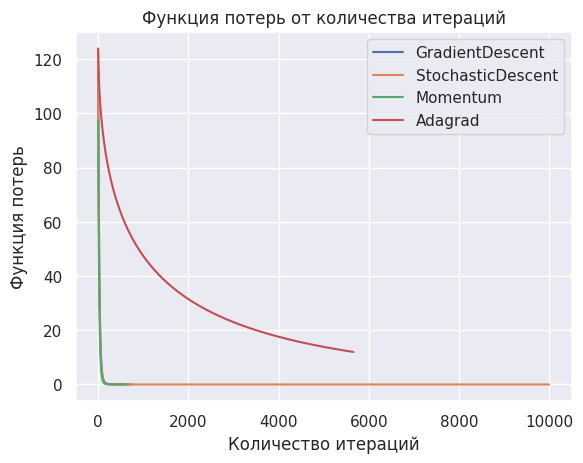

In [151]:
for model_name, loss_history in losses.items():
    plt.plot(range(1, len(loss_history) + 1), loss_history, label=model_name)

plt.xlabel('Количество итераций')
plt.ylabel('Функция потерь')
plt.title('Функция потерь от количества итераций')
plt.legend()
plt.grid(True)

plt.show()

### Анализ полученных результатов:
Глядя на графики видно, что все алгоритмы кроме адаграда демонстрируют хорошую сходимость на наших данных. Адаград улучшает свои показатели, однако его метрики выглядят значительно хуже, чем у других алгоритмов градиентного спуска.